# Projeto PAMAP2

O objetivo do projeto é desenvolver modelos que permitam classificar quanto à atividade dados com a mesma estrutura aos obtidos no dataset de referência ( [PAMAP2](https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring) ). Apenas serão consideradas as atividades 1, 2, 3, 4, 7 e 17 (as 6 mais comuns). Estas correspondem, respetivamente, a 'Lying', 'Sitting', 'Standing', 'Walking', 'Nordic Walking' e 'Ironing'.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [8]:
dataCol = pd.read_csv('data\data_df.csv')
dataCol.shape

(1942872, 43)

In [9]:
#Para experimentar o codigo: sample de 100k. Correr com os dados todos no pc
dataCol= dataCol.sample(n= 250000, random_state= 1)

In [10]:
train_val_df= dataCol.sample(frac= 0.8, random_state= 1)
test_df= dataCol.drop(train_val_df.index)

train_val_df.shape[0]+test_df.shape[0]== dataCol.shape[0] #check if the split has lost any rows. If true no rows were lost. If False some rows were lost in the split

True

In [11]:
train_val_df.to_csv('train_val_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

In [12]:
train_val_df= pd.read_csv('train_val_df.csv')
test_df= pd.read_csv('test_df.csv')

Filtrar as dfs pelas categorias a estudar

In [13]:
train_val_df= train_val_df.loc[train_val_df['activityID'].isin([1, 2, 3, 4, 7, 17])]
test_df= test_df.loc[test_df['activityID'].isin([1, 2, 3, 4, 7, 17])]
train_val_df.shape, test_df.shape

((126903, 43), (31746, 43))

In [14]:
features_tv_df= train_val_df.drop(['activityID', 'timestamp', 'subject_id'], axis= 1, inplace=False)

features_ts_df= test_df.drop(['activityID', 'timestamp', 'subject_id'], axis= 1, inplace=False)
true_labels_ts= test_df['activityID']
features_tv_df.shape, features_ts_df.shape, true_labels_ts.shape

((126903, 40), (31746, 40), (31746,))

Para utilizar a loss function 'Categorical Crossentropy' é necessário que as target labels sejam dadas no formato one-hot

In [15]:
from sklearn.preprocessing import LabelBinarizer

targets_onehot_tv = LabelBinarizer().fit_transform(train_val_df.activityID)
#targets_onehot_ts = LabelBinarizer().fit_transform(test_df.activityID)
targets_onehot_tv.shape #targets_onehot_ts.shape

(126903, 6)

Dividir o Train/Validation dataset

In [16]:
x_train, x_val, y_train, y_val = train_test_split(features_tv_df, targets_onehot_tv, test_size=0.2, random_state=1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((101522, 40), (25381, 40), (101522, 6), (25381, 6))

Tabela com os modelos e scaling a usar. O modelo simples é um modelo com 1 dense layer com 64 e o grande tem 3 dense layers com 256 units

| **Scaler/Modelo** 	| **Simples** 	| **Grande** 	|
|-------------------	|-------------	|------------	|
| **Nada**          	| NS          	| NG         	|
| **MinMax**        	| MS          	| MG         	|

Aplicar Min Max Scaling aos dados

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#apply scaling to all columns except subject and activity
scalerM = MinMaxScaler()
x_train_s = x_train.copy()
x_val_s = x_val.copy()
x_test_s= features_ts_df.copy()

x_train_s = scalerM.fit_transform(x_train_s)
x_val_s = scalerM.transform(x_val_s)
x_test_s= scalerM.transform(x_test_s)

pd.DataFrame(x_train_s).describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,...,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000,101522.000000
mean,0.427408,0.629232,0.583525,0.374342,0.417023,0.613429,0.526637,0.463339,0.465460,0.449998,...,0.444536,0.273241,0.491963,0.577029,0.417133,0.510884,0.514652,0.665436,0.651602,0.512919
std,0.218173,0.222654,0.073553,0.026287,0.044155,0.086366,0.042515,0.047864,0.031591,0.042245,...,0.021146,0.078672,0.051770,0.035754,0.051919,0.084281,0.112274,0.083891,0.094043,0.091814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244444,0.472222,0.524335,0.363831,0.385686,0.544645,0.508974,0.429072,0.459451,0.442164,...,0.436844,0.270007,0.478649,0.563250,0.412966,0.509849,0.507433,0.617718,0.598310,0.452543
50%,0.377778,0.648148,0.581349,0.375217,0.413937,0.610980,0.528377,0.460589,0.465598,0.449506,...,0.445749,0.282579,0.494721,0.579214,0.417082,0.516875,0.514321,0.656613,0.646424,0.523138
75%,0.611111,0.796296,0.635379,0.389373,0.452304,0.674855,0.551676,0.502477,0.470803,0.458144,...,0.454495,0.286924,0.507102,0.594922,0.419619,0.523921,0.516239,0.732546,0.721882,0.586087
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
n_features = features_tv_df.shape[1]
n_classes = targets_onehot_tv.shape[1]
n_features, n_classes

(40, 6)

In [19]:
pd.DataFrame(x_test_s).to_csv('scaled_test_features.csv', index= False)
true_labels_ts.to_csv('true_labels_ts.csv', index= False)
features_ts_df.to_csv('features_ts_df.csv', index= False)

In [20]:
from tensorflow import keras
tf.keras.backend.clear_session()

In [36]:
def compile_fit(model, x_train, y_train, x_val, y_val, epochs):
    model.compile(optimizer= 'adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['categorical_accuracy'])
    history = model.fit(x_train, y_train, batch_size= 512, epochs= epochs, validation_data= (x_val, y_val))

    return history

In [37]:
model_history= {}

In [38]:
NS = tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')])
model_history['NS']= compile_fit(NS, x_train, y_train, x_val, y_val, 15)

Epoch 1/15
199/199 [==============================] - 2s 8ms/step - loss: 0.6486 - categorical_accuracy: 0.8343 - val_loss: 0.2310 - val_categorical_accuracy: 0.9321
Epoch 2/15
199/199 [==============================] - 1s 7ms/step - loss: 0.1824 - categorical_accuracy: 0.9453 - val_loss: 0.1516 - val_categorical_accuracy: 0.9552
Epoch 3/15
199/199 [==============================] - 1s 6ms/step - loss: 0.1322 - categorical_accuracy: 0.9586 - val_loss: 0.1257 - val_categorical_accuracy: 0.9605
Epoch 4/15
199/199 [==============================] - 1s 6ms/step - loss: 0.1065 - categorical_accuracy: 0.9664 - val_loss: 0.1059 - val_categorical_accuracy: 0.9652
Epoch 5/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0922 - categorical_accuracy: 0.9700 - val_loss: 0.0874 - val_categorical_accuracy: 0.9724
Epoch 6/15
199/199 [==============================] - 1s 7ms/step - loss: 0.0817 - categorical_accuracy: 0.9739 - val_loss: 0.0767 - val_categorical_accuracy: 0.9759
Epoc

In [39]:
NG= tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation= 'softmax')
])
model_history['NG']= compile_fit(NG, x_train, y_train, x_val, y_val, 15)

Epoch 1/15
199/199 [==============================] - 2s 8ms/step - loss: 0.3100 - categorical_accuracy: 0.9077 - val_loss: 0.0893 - val_categorical_accuracy: 0.9677
Epoch 2/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0733 - categorical_accuracy: 0.9756 - val_loss: 0.0606 - val_categorical_accuracy: 0.9801
Epoch 3/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0556 - categorical_accuracy: 0.9815 - val_loss: 0.0725 - val_categorical_accuracy: 0.9747
Epoch 4/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0467 - categorical_accuracy: 0.9841 - val_loss: 0.0411 - val_categorical_accuracy: 0.9861
Epoch 5/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0404 - categorical_accuracy: 0.9863 - val_loss: 0.0415 - val_categorical_accuracy: 0.9856
Epoch 6/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0340 - categorical_accuracy: 0.9887 - val_loss: 0.0335 - val_categorical_accuracy: 0.9886
Epoc

In [40]:
MG = tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')])
model_history['MG']= compile_fit(MG, x_train_s, y_train, x_val_s, y_val, 15)

Epoch 1/15
199/199 [==============================] - 2s 7ms/step - loss: 0.5235 - categorical_accuracy: 0.8088 - val_loss: 0.2731 - val_categorical_accuracy: 0.9073
Epoch 2/15
199/199 [==============================] - 1s 6ms/step - loss: 0.2008 - categorical_accuracy: 0.9324 - val_loss: 0.1762 - val_categorical_accuracy: 0.9414
Epoch 3/15
199/199 [==============================] - 1s 7ms/step - loss: 0.1338 - categorical_accuracy: 0.9586 - val_loss: 0.1055 - val_categorical_accuracy: 0.9667
Epoch 4/15
199/199 [==============================] - 1s 7ms/step - loss: 0.1072 - categorical_accuracy: 0.9664 - val_loss: 0.0880 - val_categorical_accuracy: 0.9740
Epoch 5/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0776 - categorical_accuracy: 0.9768 - val_loss: 0.0883 - val_categorical_accuracy: 0.9729
Epoch 6/15
199/199 [==============================] - 1s 6ms/step - loss: 0.0639 - categorical_accuracy: 0.9807 - val_loss: 0.0600 - val_categorical_accuracy: 0.9829
Epoc

In [41]:
MS= tf.keras.Sequential([
    tf.keras.Input(shape=(n_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation= 'softmax')
])
model_history['MS']= compile_fit(MS, x_train_s, y_train, x_val_s, y_val, 15)

Epoch 1/15
199/199 [==============================] - 1s 5ms/step - loss: 0.9116 - categorical_accuracy: 0.6967 - val_loss: 0.4678 - val_categorical_accuracy: 0.8472
Epoch 2/15
199/199 [==============================] - 1s 6ms/step - loss: 0.4005 - categorical_accuracy: 0.8710 - val_loss: 0.3568 - val_categorical_accuracy: 0.8868
Epoch 3/15
199/199 [==============================] - 1s 6ms/step - loss: 0.3267 - categorical_accuracy: 0.8932 - val_loss: 0.3322 - val_categorical_accuracy: 0.8904
Epoch 4/15
199/199 [==============================] - 1s 6ms/step - loss: 0.2788 - categorical_accuracy: 0.9076 - val_loss: 0.2608 - val_categorical_accuracy: 0.9115
Epoch 5/15
199/199 [==============================] - 1s 6ms/step - loss: 0.2400 - categorical_accuracy: 0.9198 - val_loss: 0.2254 - val_categorical_accuracy: 0.9216
Epoch 6/15
199/199 [==============================] - 1s 7ms/step - loss: 0.2083 - categorical_accuracy: 0.9314 - val_loss: 0.2152 - val_categorical_accuracy: 0.9342
Epoc

In [42]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display

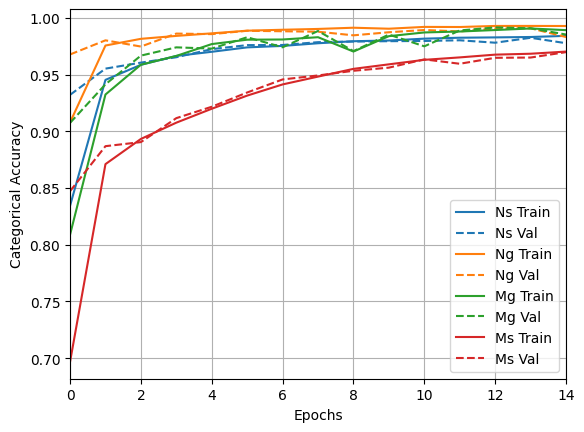

In [43]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'categorical_accuracy')
plotter.plot(model_history)


In [44]:
NS.save('Models Projeto A/NS')
NG.save('Models Projeto A/NG')
MG.save('Models Projeto A/MG')
MS.save('Models Projeto A/MS')

INFO:tensorflow:Assets written to: Models Projeto A/NS\assets
INFO:tensorflow:Assets written to: Models Projeto A/NG\assets
INFO:tensorflow:Assets written to: Models Projeto A/MG\assets
INFO:tensorflow:Assets written to: Models Projeto A/MS\assets
